<a href="https://colab.research.google.com/github/krushnapavan9/Chess-game/blob/master/KP/CS690_Assinment1_RIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#RIF,STR,KAN
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv("/content/drive/My Drive/CS690 Genomics/X_trainData_1.csv") 
Y_train = pd.read_csv("/content/drive/My Drive/CS690 Genomics/Y_trainData_1.csv")
X_test = pd.read_csv('/content/drive/My Drive/CS690 Genomics/X_testData_1.csv')
Y_tdnl = pd.read_csv('/content/drive/My Drive/CS690 Genomics/Y_testData_1_nolabels (1).csv')

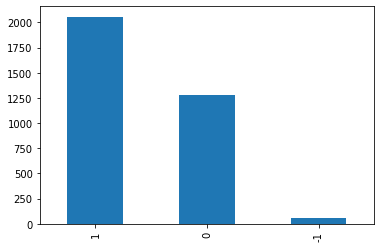

In [4]:
Y_train['RIF'].value_counts().plot(kind = 'bar')

In [5]:
#using subset of drugs
MY_DRUGS = ['RIF']
Y_train = Y_train[MY_DRUGS]
Y_tdnl = Y_tdnl[MY_DRUGS]
best_models = []

In [6]:
def hyperparameterturning(model,grid):
  drug = 'RIF'
  X = X_train[Y_train[drug]!=-1]
  y  = Y_train[drug][Y_train[drug]!=-1]
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
  grid_result = grid_search.fit(X, y)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  model = model.set_params(**grid_result.best_params_)
  model.fit(X_train[Y_train[drug]!=-1],Y_train[drug][Y_train[drug]!=-1])
  best_models.append(model)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# **LogisticRegression**

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.1]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
hyperparameterturning(model,grid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best: 0.994111 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# **SVM**

In [9]:
from sklearn.svm import SVC

model = SVC()
kernel = ['linear','poly', 'rbf', 'sigmoid']
degree = [2,3,4]
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma,degree = degree,probability=[True])
hyperparameterturning(model,grid)

Best: 0.994149 using {'C': 50, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}




```
# This is formatted as code
```

# **BaggingClassifier**

In [10]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
hyperparameterturning(model,grid)

Best: 0.992272 using {'n_estimators': 1000}


# **RandomForestClassifier**

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
hyperparameterturning(model,grid)

Best: 0.992036 using {'max_features': 'sqrt', 'n_estimators': 1000}


# **AdaBoostClassifier**

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier()
grid = dict()
grid['base_estimator'] = []
for i in range(1,6):
  grid['base_estimator'].append(DecisionTreeClassifier(max_depth=1))
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
hyperparameterturning(model,grid)

Best: 0.993173 using {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 500}


In [13]:
pip install kaggle

In [14]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/CS690 Genomics/kaggle.json' ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
for model in best_models:
  drug ='RIF'
  x_test=X_test[Y_tdnl[drug]!='-1']
  with open(drug+'_result.csv','w') as f:
    f.write('ID,'+drug+'\n')
    for a,b in zip(x_test.index,model.predict_proba(x_test)[:,model.classes_.tolist().index(1)]):
      f.write(str(a+1)+','+str(b)+'\n')
  message = str(model)
  print(message)
  !kaggle competitions submit -c tuberculosis-drug-resistance-prediction-rif -f '/content/RIF_result.csv' -m message

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
100% 21.5k/21.5k [00:00<00:00, 22.7kB/s]
Successfully submitted to Tuberculosis Drug Resistance Prediction - RIFSVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
100% 21.6k/21.6k [00:01<00:00, 13.2kB/s]
Successfully submitted to Tuberculosis Drug Resistance Prediction - RIFBaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=1000,
                  n_jobs=None, oob_score=False,

**logistic regreasion** Best: 0.994109 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} 

**SVM** Best: 0.993604 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True} 

**Boosting** Best: 0.992240 using {'n_estimators': 1000}

**random forest** Best: 0.992096 using {'max_features': 'sqrt', 'n_estimators': 1000}

**Adaboost** Best: 0.993173 using {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',max_depth=1, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort='deprecated',random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 500}



